In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

# State House Special Election

In [2]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-va/vest-va-2018'

In [3]:
final = gpd.read_file('./vest_va/va_2018_statehouse_special/va_2018_statehouse_special.shp')

In [4]:
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S18HODDEM,S18HODREP,S18HODWRI,geometry
0,009,Amherst County,000102,New Glasgow,024,117,168,2,"POLYGON Z ((-79.04809 37.53463 0.00000, -79.04..."
1,009,Amherst County,000103,Coolwell,024,21,84,1,"POLYGON Z ((-79.08422 37.51334 0.00000, -79.08..."
2,009,Amherst County,000201,Court House,024,270,408,14,"POLYGON Z ((-79.15210 37.57883 0.00000, -79.15..."
3,009,Amherst County,000202,Temperance,024,61,140,3,"POLYGON Z ((-79.30301 37.74092 0.00000, -79.30..."
4,009,Amherst County,000301,Monroe,024,68,163,5,"POLYGON Z ((-79.19354 37.57677 0.00000, -79.19..."
...,...,...,...,...,...,...,...,...,...
74,161,Roanoke County,000108,WILDWOOD,008,335,664,3,"POLYGON Z ((-80.08046 37.32419 0.00000, -80.08..."
75,161,Roanoke County,000106,GREEN HILL,008,643,1271,3,"POLYGON Z ((-80.08835 37.28149 0.00000, -80.08..."
76,161,Roanoke County,000103,GLENVAR,008,374,835,2,"POLYGON Z ((-80.21886 37.26382 0.00000, -80.21..."
77,121,Montgomery County,000304,Precinct C-4,008,599,810,3,"POLYGON Z ((-80.30263 37.16025 0.00000, -80.30..."


In [5]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

## Election results

### District 8

In [6]:
df8 = pd.read_csv('./vest_va/Virginia_Elections_Database__2018_House_of_Delegates_General_Election_District_8_including_precincts.csv')

In [7]:
df8.head()

,County/City,Ward,Pct,Joseph P. McNamara,"Edward Carter Turner, III",All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,NaN,NaN
1,Craig County,-,101 - Court House,300,80,1.0,381
2,Craig County,-,201 - Ammendale Precinct,402,90,0.0,492
3,Craig County,-,301 - Givens & Reynolds Store,188,92,0.0,280
4,Craig County,-,303 - Marshalls Store,160,77,0.0,237


In [8]:
df8['County/City'].nunique()

5

In [9]:
df8.shape

(46, 7)

In [10]:
df8 = df8.iloc[1:]

In [11]:
df8 = df8.drop(['Ward'], axis = 1)

In [12]:
df8['HOD_DIST'] = '8'

In [13]:
#dont actually need this since function rename didnt work
column_dict = {'County/City': 'LOCALITY', 'Joseph P. McNamara': 'S18HODREP', 'Edward Carter Turner, III': 'S18HODDEM',
              'All Others': 'S18HODWRI',
              'Ronnie Ray Campbell': 'S18HODREP', 'Christian Renau Worth': 'S18HODDEM'}

In [14]:
df8['LOCALITY'] = df8['County/City']
df8['S18HODREP'] = df8['Joseph P. McNamara']
df8['S18HODDEM'] = df8['Edward Carter Turner, III']
df8['S18HODWRI'] = df8['All Others']
df8 = df8.drop(['County/City', 'Joseph P. McNamara', 'Edward Carter Turner, III', 'All Others'], axis = 1)

In [15]:
df8.head()

,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI
1,101 - Court House,381,8,Craig County,300,80,1.0
2,201 - Ammendale Precinct,492,8,Craig County,402,90,0.0
3,301 - Givens & Reynolds Store,280,8,Craig County,188,92,0.0
4,303 - Marshalls Store,237,8,Craig County,160,77,0.0
5,401 - Barbours Creek,198,8,Craig County,149,49,0.0


In [16]:
df8.LOCALITY.nunique()

5

In [17]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

In [18]:
county_dict

{'Amherst County': '009',
 'Augusta County': '015',
 'Bath County': '017',
 'Rockbridge County': '163',
 'Buena Vista City': '530',
 'Lexington City': '678',
 'Craig County': '045',
 'Montgomery County': '121',
 'Roanoke County': '161',
 'Salem City': '775'}

In [19]:
df8['LOCALITY'].value_counts()

Roanoke County       15
Salem City           12
Craig County          9
Montgomery County     8
TOTALS                1
Name: LOCALITY, dtype: int64

In [20]:
df8['COUNTYFP'] = df8['LOCALITY'].map(county_dict)

In [21]:
df8.COUNTYFP.nunique()

4

In [22]:
df8.LOCALITY.nunique()

5

In [23]:
column_list = ['S18HODREP', 'S18HODDEM', 'S18HODWRI']

In [24]:
df8['S18HODREP'] = df8['S18HODREP'].map(lambda x: str(x).replace(',', ''))
df8['S18HODDEM'] = df8['S18HODDEM'].map(lambda x: str(x).replace(',', '')) 
df8['S18HODWRI'] = df8['S18HODWRI'].map(lambda x: str(x).replace(',', ''))

In [25]:
df8['S18HODREP'] = df8['S18HODREP'].astype(str).astype(float).astype(int)
df8['S18HODDEM'] = df8['S18HODDEM'].astype(str).astype(float).astype(int)
df8['S18HODWRI'] = df8['S18HODWRI'].astype(str).astype(float).astype(int)

In [26]:
df8.groupby(['COUNTYFP']).sum()

,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,
045,1666,519,1
121,3706,2955,16
161,10487,5912,23
775,5942,3906,10


### District 24

In [27]:
df24 = pd.read_csv('./vest_va/Virginia_Elections_Database__2018_House_of_Delegates_Special_General_Election_District_24_including_precincts.csv')

In [28]:
df24.head()

,County/City,Ward,Pct,Ronnie Ray Campbell,Christian Renau Worth,All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,NaN,NaN
1,Amherst County,-,102 - New Glasgow,164,114,2.0,280
2,Amherst County,-,103 - Coolwell,82,20,1.0,103
3,Amherst County,-,201 - Court House,397,261,13.0,671
4,Amherst County,-,202 - Temperance,137,59,3.0,199


In [29]:
df24['County/City'].nunique()

7

In [30]:
df24.shape

(55, 7)

In [31]:
df24 = df24.iloc[1:]

In [32]:
df24 = df24.drop(['Ward'], axis = 1)

In [33]:
df24['HOD_DIST'] = '24'

In [34]:
df24['LOCALITY'] = df24['County/City']
df24['S18HODREP'] = df24['Ronnie Ray Campbell']
df24['S18HODDEM'] = df24['Christian Renau Worth']
df24['S18HODWRI'] = df24['All Others']
df24 = df24.drop(['County/City', 'Ronnie Ray Campbell', 'Christian Renau Worth', 'All Others'], axis = 1)

In [35]:
#df24 = rename_columns(df24, column_dict)

In [36]:
df24['COUNTYFP'] = df24['LOCALITY'].map(county_dict)

In [37]:
df24['LOCALITY'].nunique()

7

In [38]:
df24['COUNTYFP'].nunique()

6

In [39]:
df24['COUNTYFP'].value_counts()

163    19
009    11
017     9
015     8
530     3
678     3
Name: COUNTYFP, dtype: int64

In [40]:
df8.COUNTYFP.value_counts()

161    15
775    12
045     9
121     8
Name: COUNTYFP, dtype: int64

In [41]:
df24['S18HODREP'] = df24['S18HODREP'].map(lambda x: str(x).replace(',', ''))
df24['S18HODDEM'] = df24['S18HODDEM'].map(lambda x: str(x).replace(',', '')) 
df24['S18HODWRI'] = df24['S18HODWRI'].map(lambda x: str(x).replace(',', ''))
df24['S18HODREP'] = df24['S18HODREP'].astype(str).astype(float).astype(int)
df24['S18HODDEM'] = df24['S18HODDEM'].astype(str).astype(float).astype(int)
df24['S18HODWRI'] = df24['S18HODWRI'].astype(str).astype(float).astype(int)

In [42]:
df24.groupby(['COUNTYFP']).sum()

,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,
009,1659,844,45
015,1369,465,1
017,360,227,0
163,2560,1861,17
530,385,236,0
678,287,853,4


In [43]:
df8.COUNTYFP.nunique() + df24.COUNTYFP.nunique()

10

In [44]:
df8.COUNTYFP.value_counts()

161    15
775    12
045     9
121     8
Name: COUNTYFP, dtype: int64

In [45]:
final.COUNTYFP.nunique()

10

In [46]:
final.HOD_DIST.value_counts()

024    42
008    37
Name: HOD_DIST, dtype: int64

### Districts 24 and 8 together

In [47]:
elections = []
elections.append(df24)
elections.append(df8)

In [48]:
df = pd.concat(elections, axis = 0)

In [49]:
df = df[df['LOCALITY'] != 'TOTALS']

In [50]:
df = df.reset_index()
df = df.fillna(0)

## Check various totals

In [51]:
for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S18HODREP: EQUAL
S18HODDEM: EQUAL
S18HODWRI: EQUAL


In [52]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(["COUNTYFP"]).sum()[i]-final.groupby(["COUNTYFP"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


## Reallocate absentee votes

In [53]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()

groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [54]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

column_list = ['S18HODREP', 'S18HODDEM', 'S18HODWRI']

In [55]:
#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['COUNTYFP']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['COUNTYFP']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['COUNTYFP']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['COUNTYFP'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['COUNTYFP']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

## Check Totals after Vote Allocation

In [56]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S18HODREP: EQUAL
S18HODDEM: EQUAL
S18HODWRI: EQUAL


In [57]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(["COUNTYFP"]).sum()[i]-final.groupby(["COUNTYFP"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


### Create unique ID to enable merge

In [58]:
set(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))

{'5301 -',
 '5302 -',
 '6781 -',
 '7751 -',
 '77510 ',
 '7752 -',
 '7753 -',
 '7754 -',
 '7755 -',
 '7756 -',
 '7757 -',
 '7758 -',
 '7759 -'}

In [59]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [60]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI,COUNTYFP,S18HODREP_add,S18HODREP_rem,S18HODREP_floor,S18HODDEM_add,S18HODDEM_rem,S18HODDEM_floor,S18HODWRI_add,S18HODWRI_rem,S18HODWRI_floor,vtdst
0,1,102 - New Glasgow,280,24,Amherst County,168.0,118.0,2.0,009,4.0,0.155748,4.0,4.0,0.623472,3.0,0.0,0.045455,0.0,102
1,2,103 - Coolwell,103,24,Amherst County,84.0,21.0,1.0,009,2.0,0.077874,2.0,1.0,0.635697,0.0,0.0,0.022727,0.0,103
2,3,201 - Court House,671,24,Amherst County,407.0,269.0,14.0,009,10.0,0.059951,10.0,8.0,0.295844,8.0,1.0,0.295455,0.0,201
3,4,202 - Temperance,199,24,Amherst County,140.0,61.0,3.0,009,3.0,0.471570,3.0,2.0,0.875306,1.0,0.0,0.068182,0.0,202
4,5,301 - Monroe,230,24,Amherst County,163.0,68.0,5.0,009,4.0,0.029048,4.0,2.0,0.097800,2.0,0.0,0.113636,0.0,301


In [61]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.vtdst
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI,COUNTYFP,S18HODREP_add,S18HODREP_rem,S18HODREP_floor,S18HODDEM_add,S18HODDEM_rem,S18HODDEM_floor,S18HODWRI_add,S18HODWRI_rem,S18HODWRI_floor,vtdst,unique_id
0,1,102 - New Glasgow,280,24,Amherst County,168.0,118.0,2.0,009,4.0,0.155748,4.0,4.0,0.623472,3.0,0.0,0.045455,0.0,102,009102
1,2,103 - Coolwell,103,24,Amherst County,84.0,21.0,1.0,009,2.0,0.077874,2.0,1.0,0.635697,0.0,0.0,0.022727,0.0,103,009103
2,3,201 - Court House,671,24,Amherst County,407.0,269.0,14.0,009,10.0,0.059951,10.0,8.0,0.295844,8.0,1.0,0.295455,0.0,201,009201
3,4,202 - Temperance,199,24,Amherst County,140.0,61.0,3.0,009,3.0,0.471570,3.0,2.0,0.875306,1.0,0.0,0.068182,0.0,202,009202
4,5,301 - Monroe,230,24,Amherst County,163.0,68.0,5.0,009,4.0,0.029048,4.0,2.0,0.097800,2.0,0.0,0.113636,0.0,301,009301


In [62]:
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)

In [63]:
set(df_with_absentee_reallocated.unique_id) - set(final.unique_id)

set()

In [64]:
set(final.unique_id) - set(df_with_absentee_reallocated.unique_id)

set()

# Shapefile

In [65]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-va/vest-va-2018'

In [66]:
county_fips = []
for directory in os.listdir('./vest_va/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

In [67]:
proj = final.crs

In [68]:
county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [69]:
global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

In [70]:
pwd

'/Users/peterhorton/Documents/RDH/pdv/pdv-va/vest-va-2018'

In [71]:
county_sldl = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    sldl_ref = ref + i + '/PVS_19_v2_sldl_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldl_shp = gpd.read_file(sldl_ref)
    print(i, ' added to list')
    county_sldl.append(sldl_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [72]:
global shp_sldl
shp_sldl = gpd.GeoDataFrame(pd.concat(county_sldl, axis = 0) , crs = proj) 

<AxesSubplot:>

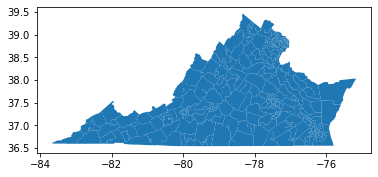

In [73]:
shp_sldl.plot()

In [74]:
overlay = gpd.overlay(shp_sldl, shp_vtd, how='intersection', make_valid=True, keep_geom_type=True)

<AxesSubplot:>

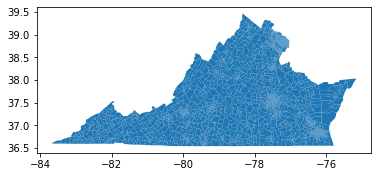

In [75]:
overlay.plot()

In [76]:
overlay.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'SLDLST', 'NAMELSAD_1', 'LSAD_1', 'PARTFLG',
       'CHNG_TYPE_1', 'EFF_DATE', 'NEW_NAME', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'LSY',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry'],
      dtype='object')

In [77]:
shp = overlay[(overlay.SLDLST == '008') | (overlay.SLDLST == '024')]

<AxesSubplot:>

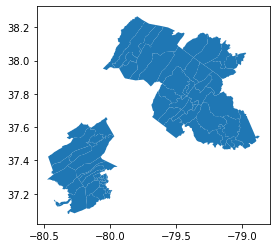

In [78]:
shp.plot()

<AxesSubplot:>

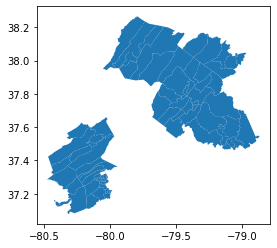

In [79]:
final.plot()

In [80]:
shp.shape

(80, 42)

In [81]:
final.shape

(79, 10)

In [82]:
shp.head()

,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_NAME,NEW_CODE,...,CHNG_TYPE_2,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,geometry
47,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,A-1,90,N,None,G5240,"POLYGON Z ((-80.33861 37.22832 0.00000, -80.33..."
54,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,B-2,90,N,None,G5240,"POLYGON Z ((-80.40208 37.12368 0.00000, -80.40..."
56,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,C-1,90,N,None,G5240,"POLYGON Z ((-80.19748 37.10620 0.00000, -80.19..."
57,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,C-3,90,N,None,G5240,"POLYGON Z ((-80.31232 37.20143 0.00000, -80.31..."
59,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,C-4,90,N,None,G5240,"POLYGON Z ((-80.29725 37.16324 0.00000, -80.29..."


In [83]:
shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'SLDLST', 'NAMELSAD_1', 'LSAD_1', 'PARTFLG',
       'CHNG_TYPE_1', 'EFF_DATE', 'NEW_NAME', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'LSY',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry'],
      dtype='object')

In [84]:
len(set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3)))

1

In [85]:
len(set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)))

0

In [86]:
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Join election results and shapefile

<AxesSubplot:>

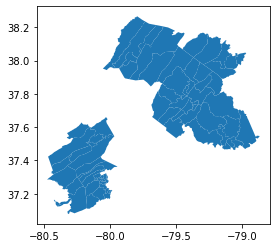

In [87]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'inner'), crs = proj)
join.plot()

In [88]:
shp

,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_NAME,NEW_CODE,...,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,geometry,unique_id
47,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,A-1,90,N,None,G5240,"POLYGON Z ((-80.33861 37.22832 0.00000, -80.33...",121101
54,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,B-2,90,N,None,G5240,"POLYGON Z ((-80.40208 37.12368 0.00000, -80.40...",121202
56,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,C-1,90,N,None,G5240,"POLYGON Z ((-80.19748 37.10620 0.00000, -80.19...",121301
57,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,C-3,90,N,None,G5240,"POLYGON Z ((-80.31232 37.20143 0.00000, -80.31...",121303
59,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,C-4,90,N,None,G5240,"POLYGON Z ((-80.29725 37.16324 0.00000, -80.29...",121304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,51,163,024,State House District 24,LL,Y,None,None,None,None,...,None,None,None,Falling Spring,90,N,None,G5240,"POLYGON Z ((-79.53720 37.65510 0.00000, -79.53...",163303
2574,51,163,024,State House District 24,LL,Y,None,None,None,None,...,None,None,None,Fairfield,90,N,None,G5240,"POLYGON Z ((-79.36851 37.84122 0.00000, -79.36...",163401
2575,51,163,024,State House District 24,LL,Y,None,None,None,None,...,None,None,None,Meadowview,90,N,None,G5240,"POLYGON Z ((-79.42562 37.81665 0.00000, -79.42...",163502
2576,51,530,024,State House District 24,LL,Y,None,None,None,None,...,None,None,None,First Ward,90,N,None,G5240,"POLYGON Z ((-79.33977 37.73184 0.00000, -79.33...",530001


### Refining shp match

In [89]:
shp_id_list = list(set(shp['unique_id']) - set(df_with_absentee_reallocated['unique_id']))
df_id_list = list(set(df_with_absentee_reallocated['unique_id']) - set(shp['unique_id']))

In [90]:
print(shp.shape[0])
print(len(shp_id_list))
print(df_with_absentee_reallocated.shape[0])
len(df_id_list)

80
1
79


0

In [91]:
set(final.unique_id) - set(df_with_absentee_reallocated.unique_id)

set()

# Validation

<AxesSubplot:>

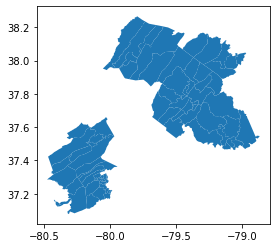

In [93]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'inner'), crs = proj)
join.plot()

## Validating Shapfile

<AxesSubplot:>

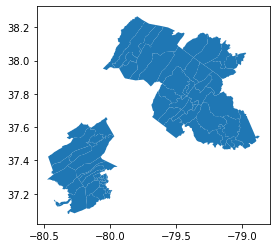

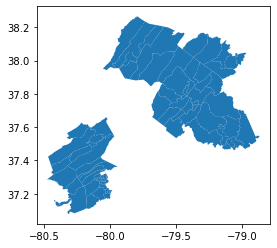

In [94]:
shp.plot()
final.plot()

In [95]:
shp_final_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'],indicator=True)

both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    77
True      2
dtype: int64


1) For 103 - Glenvar difference in area is 1.142864239662663


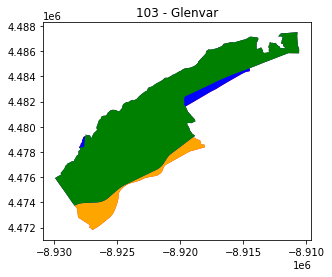

In [96]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [97]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(79, 1)
61 precincts w/ a difference of 0 km^2
11 precincts w/ a difference between 0 and .1 km^2
5 precincts w/ a difference between .1 and .5 km^2
1 precincts w/ a difference between .5 and 1 km^2
1 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


### County 121 ex

(6, 72)


<AxesSubplot:>

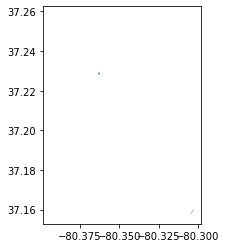

In [98]:
print(shp_final_merge[shp_final_merge['unique_id'].str[0:3] == '121'].shape)
ex_x = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '121'], geometry = 'geometry_x', crs = proj)
ex_y = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '121'], geometry = 'geometry_y', crs = proj)

gpd.overlay(ex_x, ex_y, how = 'symmetric_difference').plot()

## Validating election results

In [99]:
final_df_merge = pd.merge(df_with_absentee_reallocated, final, on = 'unique_id', how = 'inner', suffixes = ['_x', '_y'])

In [100]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'HOD_DIST', 'S18HODDEM',
       'S18HODREP', 'S18HODWRI', 'geometry', 'unique_id'],
      dtype='object')

In [101]:
column_list = ['S18HODDEM', 'S18HODREP', 'S18HODWRI']

In [102]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["Pct"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["Pct"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["Pct"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [103]:
validater_row(final_df_merge, column_list)

S18HODDEM .......................................................102 - New Glasgow (V) ..118  (S)..117 (D):   -1
S18HODDEM .......................................................201 - Court House (V) ..269  (S)..270 (D):    1
S18HODREP .......................................................201 - Court House (V) ..407  (S)..408 (D):    1
S18HODREP .....................................................303 - Pleasant View (V) ..102  (S)..101 (D):   -1
S18HODREP ........................................................504 - White Hill (V) ..191  (S)..190 (D):   -1
S18HODREP .........................................................602 - Ridgeview (V) ..442  (S)..443 (D):    1
S18HODDEM ....................................................202 - Highland Belle (V) ..296  (S)..297 (D):    1
S18HODDEM ........................................................502 - Meadowview (V) ..141  (S)..140 (D):   -1
S18HODREP ......................................................101 - Precinct A-1 (V) ..579  (S